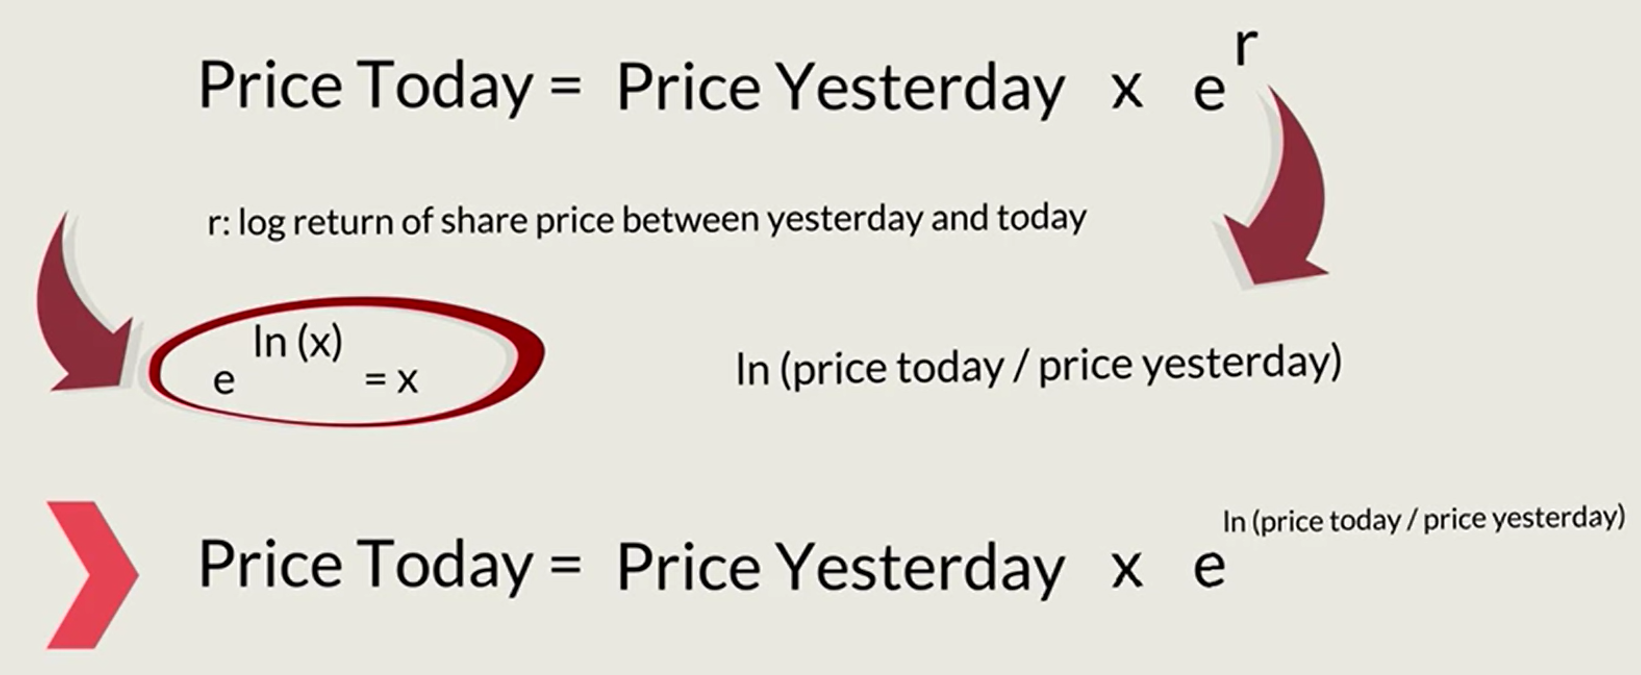

# Import Data

In [1]:
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta

#start downloading data from 2 years ago
today = datetime.today()
start_date = today - relativedelta(years=2)

data = yf.download('PG', start=start_date)

[*********************100%%**********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,150.949997,151.710007,149.119995,151.570007,144.226868,6447300
2023-01-04,151.990005,153.389999,151.229996,152.229996,144.854874,7313400
2023-01-05,152.210007,152.479996,150.130005,150.339996,143.056442,5373800
2023-01-06,151.850006,154.460007,151.750000,153.919998,146.463028,7882200
2023-01-09,153.440002,154.800003,152.000000,152.039993,144.674088,5727000
...,...,...,...,...,...,...
2024-12-24,167.619995,169.179993,167.419998,168.940002,168.940002,2460800
2024-12-26,168.309998,170.300003,168.070007,170.160004,170.160004,3629400
2024-12-27,169.419998,170.759995,169.259995,169.529999,169.529999,4367900


# Calculate Log Return

In [3]:
import numpy as np
data['Log Ret'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [4]:
# Different formula for log returns
data['Log Ret'] = np.log(1 + data['Adj Close'].pct_change())

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume,Log Ret
Date,,,,,,,
2023-01-03,150.949997,151.710007,149.119995,151.570007,144.226868,6447300,NaN
2023-01-04,151.990005,153.389999,151.229996,152.229996,144.854874,7313400,0.004345
2023-01-05,152.210007,152.479996,150.130005,150.339996,143.056442,5373800,-0.012493
2023-01-06,151.850006,154.460007,151.750000,153.919998,146.463028,7882200,0.023534
2023-01-09,153.440002,154.800003,152.000000,152.039993,144.674088,5727000,-0.012289
...,...,...,...,...,...,...,...
2024-12-24,167.619995,169.179993,167.419998,168.940002,168.940002,2460800,0.004925
2024-12-26,168.309998,170.300003,168.070007,170.160004,170.160004,3629400,0.007196
2024-12-27,169.419998,170.759995,169.259995,169.529999,169.529999,4367900,-0.003709


<Axes: xlabel='Date'>

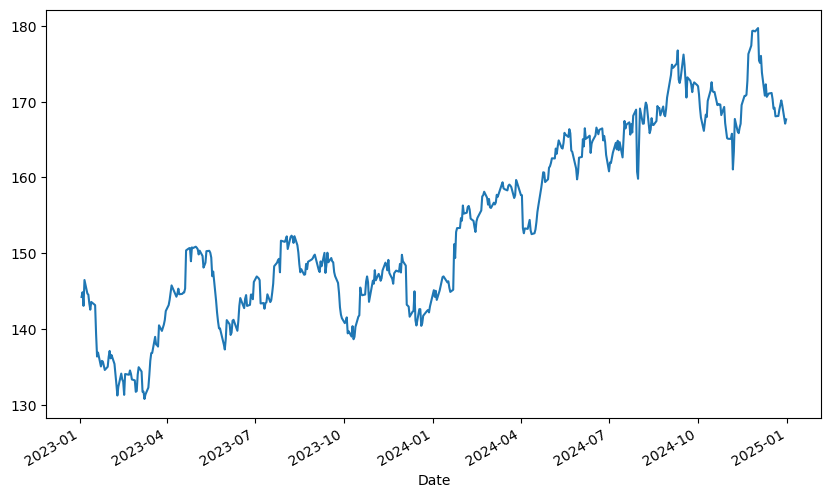

In [6]:
data['Adj Close'].plot(figsize = (10, 6))

<Axes: xlabel='Date'>

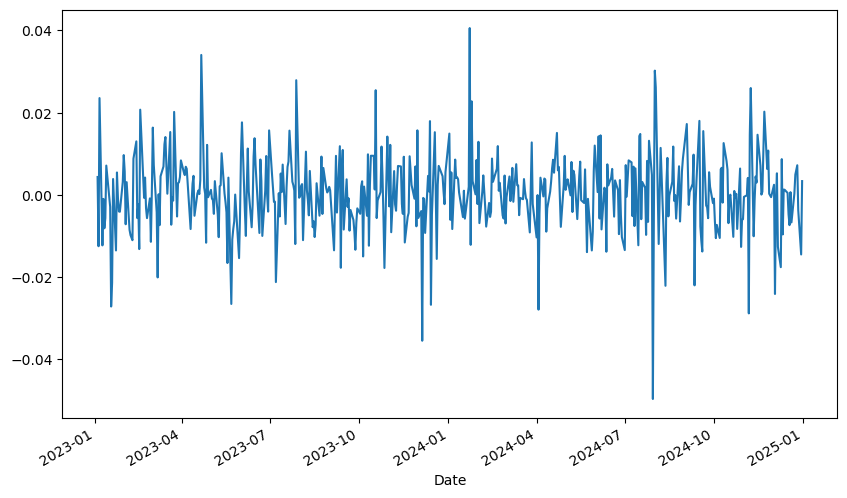

In [7]:
data['Log Ret'].plot(figsize = (10, 6))

In [8]:
#Double [[]] to retain the structure of a Pandas DataFrame, otherwise turns into Pandas Series 
log_returns = data[['Log Ret']]
log_returns

,Log Ret
Date,
2023-01-03,NaN
2023-01-04,0.004345
2023-01-05,-0.012493
2023-01-06,0.023534
2023-01-09,-0.012289
...,...
2024-12-24,0.004925
2024-12-26,0.007196
2024-12-27,-0.003709


# Calculate Drift and Standard Deviation

#### Mean

In [9]:
u = log_returns.mean()
u

Log Ret    0.0003
dtype: float64

#### Variance

In [10]:
var = log_returns.var()
var

Log Ret    0.000089
dtype: float64

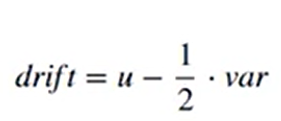

#### Drift

In [11]:
drift = u - (0.5 * var)
drift

Log Ret    0.000256
dtype: float64

#### Volatility

In [12]:
std = log_returns.std()
std

Log Ret    0.009425
dtype: float64

#### How to convert into an array

In [13]:
np.array(drift)

array([0.00025597])

In [14]:
np.array(std)

array([0.00942457])

In [15]:
drift.values

array([0.00025597])

In [16]:
std.values

array([0.00942457])

#### How to calculate z  - Part 1

In [17]:
# Generates random numbers (will be used as confidence levels/ probabilities)
X = np.random.rand(10, 2)
X

array([[0.43100476, 0.84687439],
       [0.71905106, 0.51879445],
       [0.08862974, 0.60566291],
       [0.78976418, 0.38723646],
       [0.97612272, 0.93816531],
       [0.4698097 , 0.81822808],
       [0.76092263, 0.80706506],
       [0.36053813, 0.28732717],
       [0.96706571, 0.3758999 ],
       [0.35904412, 0.61246948]])

In [18]:
# norm function calculates number of standard deviations from the mean for a given cofidence level
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

In [19]:
# Shows the number of standard deviations from the previous confidence levels from the mean 0
norm.ppf(X)

array([[-0.1738167 ,  1.02311978],
       [ 0.58002481,  0.04712813],
       [-1.3492413 ,  0.26803266],
       [ 0.80560326, -0.28652908],
       [ 1.97954603,  1.53955285],
       [-0.07574823,  0.90863308],
       [ 0.70927354,  0.86713165],
       [-0.35702076, -0.56121006],
       [ 1.83931695, -0.31626707],
       [-0.36101499,  0.28576119]])

#### How to calculate z - Part 2

In [20]:
z = norm.ppf(np.random.rand(10, 2))
z

array([[-0.30637154,  0.04056606],
       [-1.29595109, -1.25136824],
       [-0.1071974 ,  1.07474841],
       [ 2.1192159 , -2.41421758],
       [ 0.77358408,  0.18883019],
       [ 0.65840653, -0.44852054],
       [ 1.54778454, -1.0378653 ],
       [ 0.88108574, -1.32449667],
       [ 1.22457552, -0.50345468],
       [-0.61325605, -1.01058873]])

# Calculate Brownian Motion

In [21]:
# Prediction for the next 30 days
t_intervals = 30
# 10 Different predictions
iterations = 10

In [22]:
z = norm.ppf(np.random.rand(t_intervals, iterations))
z

array([[-1.50164907,  0.9144381 ,  2.71296508,  1.28194019,  0.10757912,
         0.72994666,  0.410273  , -0.18123975, -1.03500656, -0.14687775],
       [-0.18300421, -0.04069801,  1.50026527, -1.51728666,  1.14416735,
        -0.92394046, -0.58045265, -1.05060646, -0.58676018,  0.70678528],
       [-0.91686178, -0.17456162, -0.49130891, -0.58435303,  1.83099164,
         0.61263696, -1.65116677,  1.10057406,  0.13873266,  1.57422437],
       [ 0.1890513 ,  0.69380033, -0.20896909, -1.03905372, -1.64286168,
        -1.0741821 ,  0.57490896, -0.08688408, -1.18942765, -2.21666434],
       [-0.70526456, -1.66737917, -1.23241021, -0.70615962, -0.85753428,
         1.07741264, -1.50835935, -0.75583642, -0.20273768,  0.48832653],
       [ 1.47896176,  1.75381076, -0.61215638, -0.53495396,  0.41740951,
         0.74179273, -1.97471744, -0.96318272,  0.16164146,  0.87961139],
       [-0.65514981,  0.25060253, -0.51894367,  0.40034521, -1.88817985,
         0.0223075 , -1.62877913,  0.31820476

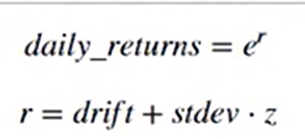

In [23]:
daily_returns = np.exp(drift.values + std.values * z)
daily_returns

array([[0.98619968, 1.00891365, 1.02616085, 1.01241413, 1.00127066,
        1.00716092, 1.00413113, 0.99854892, 0.99054644, 0.99887235],
       [0.99853231, 0.99987242, 1.01449944, 0.98605434, 1.01110042,
        0.99158384, 0.99479902, 0.99040082, 0.99473989, 1.0069411 ],
       [0.99164999, 0.99861177, 0.99563515, 0.99476246, 1.01766653,
        1.00604803, 0.98481096, 1.01068509, 1.00156469, 1.01520683],
       [1.00203978, 1.00681788, 0.99828799, 0.99050866, 0.98488805,
        0.99018079, 1.00569037, 0.99943728, 0.9891059 , 0.9795763 ],
       [0.99362953, 0.9846605 , 0.9887053 , 0.99362115, 0.99220462,
        1.0104645 , 0.98613731, 0.99315606, 0.99834662, 1.00487006],
       [1.01429578, 1.01692655, 0.99450183, 0.99522569, 1.00419867,
        1.00727337, 0.98181252, 0.99121718, 1.00178096, 1.00858255],
       [0.99409894, 1.00262122, 0.99537587, 1.00403718, 0.9826136 ,
        1.00046632, 0.98501877, 1.00326022, 0.98803283, 0.98477565],
       [1.00987688, 1.01667351, 0.9831840

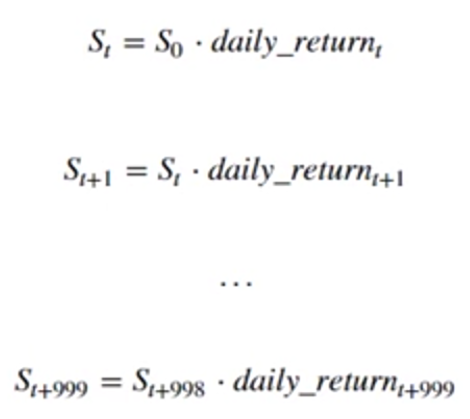

In [24]:
S0 = data['Close'].iloc[-1]
S0

167.64999389648438

In [25]:
# zeros_like function creates array with the same dimensions/ size as the daily returns array
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [26]:
price_list[0] = S0
price_list

array([[167.6499939, 167.6499939, 167.6499939, 167.6499939, 167.6499939,
        167.6499939, 167.6499939, 167.6499939, 167.6499939, 167.6499939],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       

In [27]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [28]:
price_list

array([[167.6499939 , 167.6499939 , 167.6499939 , 167.6499939 ,
        167.6499939 , 167.6499939 , 167.6499939 , 167.6499939 ,
        167.6499939 , 167.6499939 ],
       [167.40393585, 167.62860452, 170.0808255 , 165.31200455,
        169.51097887, 166.2390247 , 166.77805007, 166.04069141,
        166.76813612, 168.81366908],
       [166.00611201, 167.39589666, 169.33844753, 164.4461755 ,
        172.50564901, 167.24444303, 164.24485166, 167.81485185,
        167.02907636, 171.38078978],
       [166.34472718, 168.53718169, 169.04853878, 162.88536097,
        169.89875165, 165.60223419, 165.17946583, 167.72041952,
        165.20944414, 167.88055978],
       [165.28503298, 165.9519052 , 167.1391858 , 161.84633929,
        168.57432578, 167.33517868, 162.88963394, 166.57255107,
        164.93629042, 168.69814817],
       [167.64791082, 168.76089806, 166.22022562, 161.07363464,
        169.28211318, 168.55227003, 159.9270825 , 165.10957411,
        165.23003466, 170.14600907],
       [16

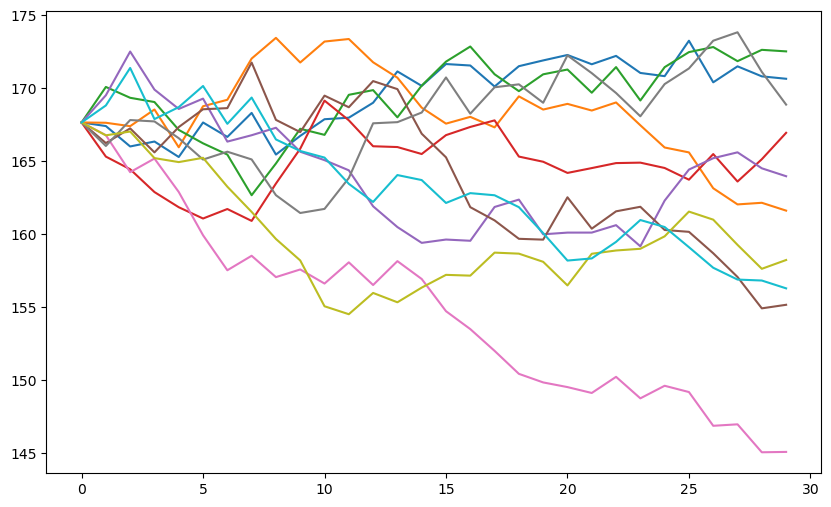

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(price_list)